<a href="https://colab.research.google.com/github/Tatoloops/PublicRepository/blob/PyNotebook/Python/Notebooks/Solemne_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solemne III

* Integrantes:  
> Tomás Castillo Á  
> Carlos Campos  
> Sebastián Gonzáles

##Procesamiento de Datos:

el conjunto de datos seleccionado está relacionado con el gasto anual de clientes en diferentes categorías de productos.

In [1]:
from google.colab import files

dataUpload = files.upload()

for fn in dataUpload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(dataUpload[fn])))

Saving WholesaleCustomersData.xlsx to WholesaleCustomersData.xlsx
User uploaded file "WholesaleCustomersData.xlsx" with length 23595 bytes


In [2]:
import pandas as pd

dataFrame = pd.read_excel(next(iter(dataUpload.keys())))

Dentro del Dataframe hay información correspondiente a 3 regiones y 2 canales, se procederá a:
* Eliminar toda la información del canal 2.
* Eliminar toda la información de la región 3.
* Eliminar la columna "Channel" correspondiente a los canales (ya que toda la información restante pertenecerá al canal 1)  

Con esto sólo existirán los gastos anuales correspondientes a las categorías de productos para las regiones 1 y 2 sobre el mismo canal.

In [10]:
def delete_column(dataframe, column_name):
    if column_name in dataframe.columns:
        dataframe = dataframe.drop(column_name, axis=1)
        print(f"Column '{column_name}' deleted successfully.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

    return dataframe

def delete_rows(dataframe,name,value):
    if name in dataframe.columns:
        rows_to_delete = dataframe[dataframe[name] == value].index
        dataframe = dataframe.drop(index=rows_to_delete)
        print(f"Rows with '{name}' value equal to {value} deleted successfully.")
    else:
        print(f"Column '{name}' not found in the DataFrame.")

    return dataframe

dataFrame = delete_rows(dataFrame,"Channel",2)
dataFrame = delete_rows(dataFrame,"Region",3)
delete_column(dataFrame,"Channel")

Rows with 'Channel' value equal to 2 deleted successfully.
Rows with 'Region' value equal to 3 deleted successfully.
Column 'Channel' deleted successfully.


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,1,30624,7209,4897,18711,763,2876
198,1,11686,2154,6824,3527,592,697
199,1,9670,2280,2112,520,402,347
202,1,25203,11487,9490,5065,284,6854
203,1,583,685,2216,469,954,18
...,...,...,...,...,...,...,...
332,2,22321,3216,1447,2208,178,2602
336,2,13970,1511,1330,650,146,778
337,2,9351,1347,2611,8170,442,868
338,2,3,333,7021,15601,15,550


Agregamos una columna nueva a nuestro dataFrame llamada "year", la cual asignará un año a cada fila de nuestro dataset. Este proceso se realizará por cada región de nuestro estudio (1 y 2)

In [15]:

# Assuming your DataFrame is named dataFrame

# Create counters for each region
yearRegion1 = 1
yearRegion2 = 1

# Create an empty list to store the year values
years = []

# Loop through each row in the DataFrame
for index, row in dataFrame.iterrows():
    # Check the region of the current row
    if row['Region'] == 1:
        # Assign the year value based on the region counter
        years.append(yearRegion1)
        # Increment the counter for Region 1
        yearRegion1 += 1
    elif row['Region'] == 2:
        # Assign the year value based on the region counter
        years.append(yearRegion2)
        # Increment the counter for Region 2
        yearRegion2 += 1

# Add the "year" column to the DataFrame
dataFrame['year'] = years

# Display the updated DataFrame
print(dataFrame)


     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
196        1       1  30624   7209     4897   18711               763   
198        1       1  11686   2154     6824    3527               592   
199        1       1   9670   2280     2112     520               402   
202        1       1  25203  11487     9490    5065               284   
203        1       1    583    685     2216     469               954   
..       ...     ...    ...    ...      ...     ...               ...   
332        1       2  22321   3216     1447    2208               178   
336        1       2  13970   1511     1330     650               146   
337        1       2   9351   1347     2611    8170               442   
338        1       2      3    333     7021   15601                15   
339        1       2   2617   1188     5332    9584               573   

     Delicassen  year  
196        2876     1  
198         697     2  
199         347     3  
202        6854     4  
203

In [51]:
# Assuming your DataFrame is named dataFrame

# Create two separate DataFrames based on the region
dataRegion1 = dataFrame[dataFrame['Region'] == 1]
dataRegion2 = dataFrame[dataFrame['Region'] == 2]

# Display the two DataFrames
print("Data for Region 1:")
print(dataRegion1)

print("\nData for Region 2:")
print(dataRegion2)

Data for Region 1:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
196        1       1  30624   7209     4897   18711               763   
198        1       1  11686   2154     6824    3527               592   
199        1       1   9670   2280     2112     520               402   
202        1       1  25203  11487     9490    5065               284   
203        1       1    583    685     2216     469               954   
204        1       1   1956    891     5226    1383                 5   
206        1       1   6373    780      950     878               288   
208        1       1   1537   3748     5838    1859              3381   
210        1       1  18567   1895     1393    1801               244   
212        1       1   7291   1012     2062    1291               240   
213        1       1   3317   6602     6861    1329              3961   
215        1       1   2806  10765    15538    1374              5828   
217        1       1  18044   14

Para descargar en nuevo dataSet

In [17]:
dataFrame.to_csv('output_data.csv', index=False)
files.download('output_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Reducción de Dimensiones y Modelado:

## Interpretación de Clústeres:

## Visualización:

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

ValueError: ignored

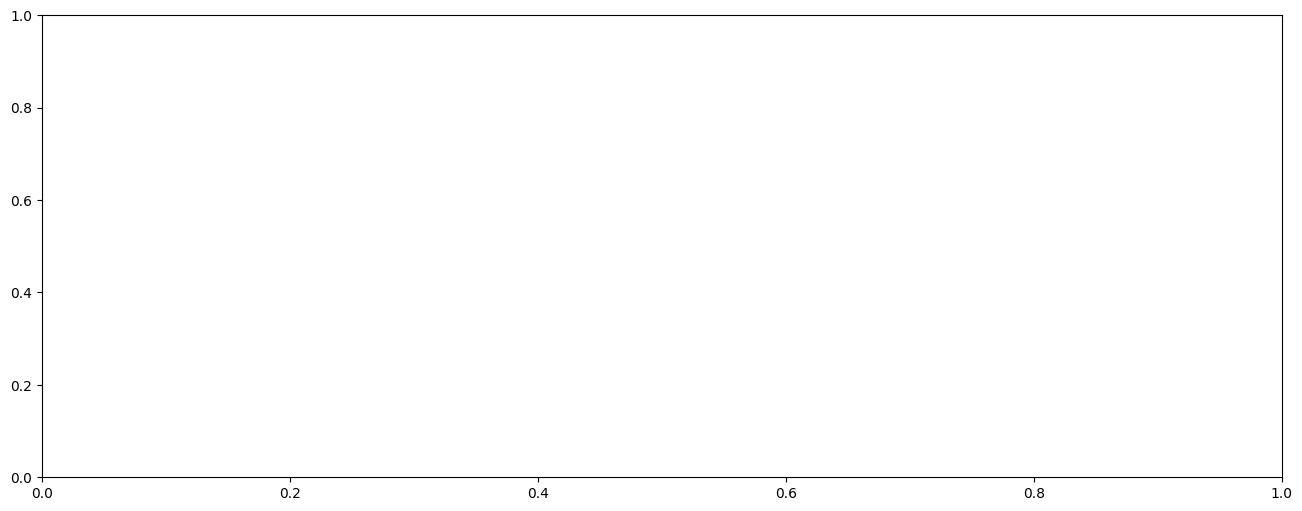

In [35]:
def data_comparison(data,RegionList, column_to_compare):
    # Filtrar el DataFrame según el rango de años y la lista de países
    filtered_data = data[(data['Region'].isin(RegionList))]

    # Colores personalizados para cada region
    region_colors = {'1': 'red', '2': 'blue'}

    # Crear el gráfico de barras
    fig, ax = plt.subplots(figsize=(16, 6))

    # Barra para cada país en cada año
    for i, Region in enumerate(RegionList):
        subset_data = filtered_data[filtered_data['Region'] == RegionList]
        ax.bar(subset_data['0'] + 0.2 * i, subset_data[column_to_compare], width=0.2, label=region, color=region_colors[region], alpha=0.7)

    # Configurar etiquetas y formatear tipo de valores sobre el eje Y
    if column_to_compare == "Fresh":
        columnName = "Productos frescos."
        #ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))
    elif column_to_compare == "Milk":
        columnName = "Leche"
        #ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))
    elif column_to_compare == "Productos congelados.":
        columnName = "porcentaje de desempleo"
        #ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}%'))

    # Configurar etiquetas y leyenda
    ax.set_xlabel('Año')
    ax.set_ylabel(f'{columnName}')
    ax.set_title(f'Comparación de {columnName} entre Regiones')
    ax.legend(title='Regiones')

    # Mostrar el gráfico
    plt.show()

# Generando gráficos
data_comparison(dataFrame,[1,2], 'Fresh')


     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
196        1       1  30624   7209     4897   18711               763   
198        1       1  11686   2154     6824    3527               592   
199        1       1   9670   2280     2112     520               402   
202        1       1  25203  11487     9490    5065               284   
203        1       1    583    685     2216     469               954   

     Delicassen  
196        2876  
198         697  
199         347  
202        6854  
203          18  
       Channel     Region         Fresh          Milk       Grocery  \
count     87.0  87.000000     87.000000     87.000000     87.000000   
mean       1.0   1.321839  12499.402299   3366.218391   4145.011494   
std        0.0   0.469890  11328.471783   3970.957065   3439.828888   
min        1.0   1.000000      3.000000    258.000000    489.000000   
25%        1.0   1.000000   4567.000000   1071.000000   1841.000000   
50%        1.0   1.000000  

ValueError: ignored

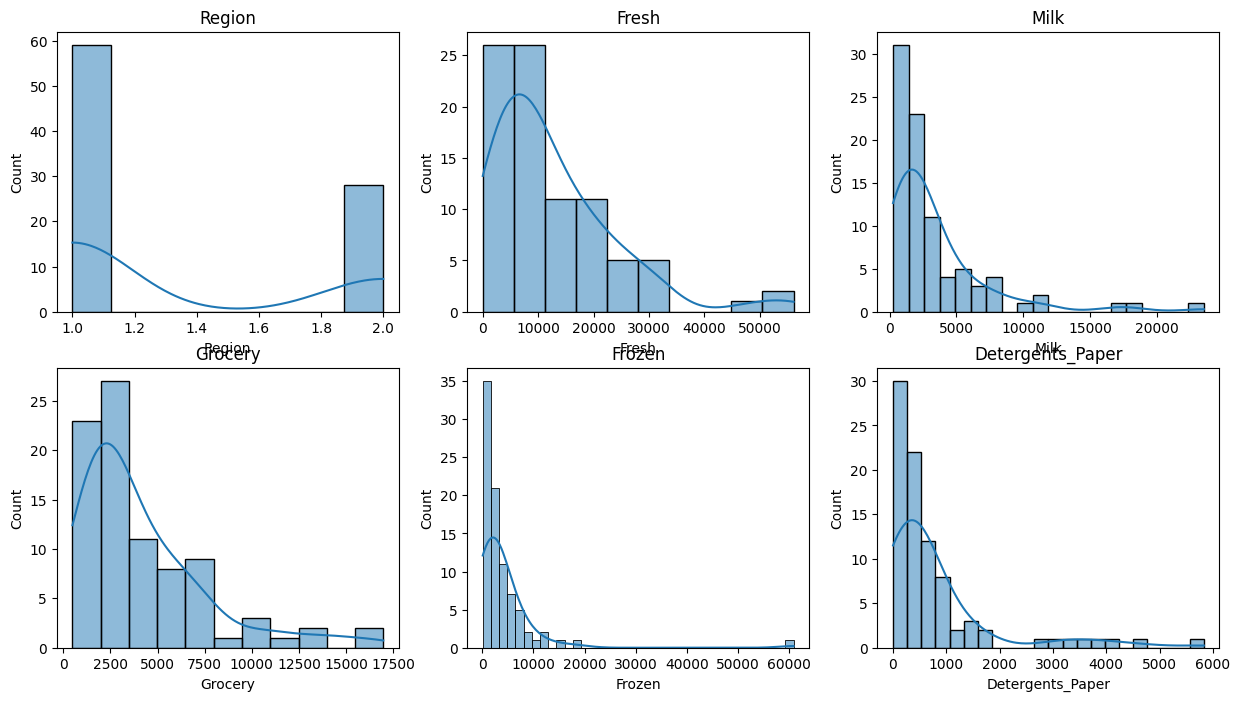

In [13]:
# Cargar el DataFrame
# Supongamos que tu DataFrame se llama 'df'
# df = pd.read_csv('nombre_del_archivo.csv')

# Visualizar las primeras filas del DataFrame
print(dataFrame.head())

# Estadísticas descriptivas
print(dataFrame.describe())

# Visualizaciones Univariables
plt.figure(figsize=(15, 8))

# Histogramas para cada categoría de productos
for column in dataFrame.columns[1:]:
    plt.subplot(2, 3, dataFrame.columns.get_loc(column))
    sns.histplot(dataFrame[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Boxplots para identificar valores atípicos
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataFrame.iloc[:, 1:])
plt.title('Boxplots para cada categoría de productos')
plt.show()

# Matriz de correlación
correlation_matrix = dataFrame.iloc[:, 1:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 8))

for i, column1 in enumerate(dataFrame.columns[2:]):
    for j, column2 in enumerate(dataFrame.columns[2:]):
        if i < j:
            plt.subplot(3, 3, i * 3 + j - 1)
            sns.scatterplot(x=column1, y=column2, data=dataFrame, hue='Region')
            plt.title(f'{column1} vs {column2}')

plt.tight_layout()
plt.show()


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que df es tu DataFrame con las columnas 'region', 'milk', 'frozen', 'groceries', ...
# X serán las características de entrada (region, categorías de productos), y y será la demanda.
X = dataFrame[['Region', 'Milk', 'Frozen', 'Grocery']]
y = dataFrame['demand']

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y.values.reshape(-1, 1), test_size=0.2, random_state=42)

# Convertir datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Definir la arquitectura de la red neuronal
class DemandPredictionModel(nn.Module):
    def __init__(self, input_size):
        super(DemandPredictionModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.fc(x)

# Crear el modelo
input_size = X_train_tensor.shape[1]
model = DemandPredictionModel(input_size)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor)
    print(f'Mean Squared Error on Test Data: {mse.item():.4f}')


KeyError: ignored

Entrenamos nuestra máquina con los datos proporcionados.

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que df es tu DataFrame con las columnas 'region', 'milk', 'frozen', 'groceries', ...
# X serán las características de entrada (region, categorías de productos), y será el gasto anual.
X = dataFrame[['Region', 'Milk', 'Frozen', 'Grocery']]
y = dataFrame[['Milk', 'Frozen', 'Grocery']]  # Cambiar 'milk', 'frozen', 'groceries' según tus necesidades

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convertir datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Definir la arquitectura de la red neuronal
class ExpenditurePredictionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ExpenditurePredictionModel, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Crear el modelo
input_size = X_train_tensor.shape[1]
output_size = y_train_tensor.shape[1]
model = ExpenditurePredictionModel(input_size, output_size)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 40
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor)
    print(f'Mean Squared Error on Test Data: {mse.item():.4f}')


Mean Squared Error on Test Data: 117033872.0000


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que df es tu DataFrame con las columnas 'Region', 'Milk', 'Frozen', 'Grocery', ...
# X serán las características de entrada (region, categorías de productos), y será el gasto anual.
X = dataFrame[['Region', 'Milk', 'Frozen', 'Grocery']]
y_columns = ['Milk', 'Frozen', 'Grocery']  # Cambiar 'Milk', 'Frozen', 'Grocery' según tus necesidades

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertir datos a tensores de PyTorch
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(dataFrame[y_columns].values, dtype=torch.float32)

# División de datos (puedes adaptarlo según tus necesidades)
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Definir la arquitectura de la red neuronal
class ExpenditurePredictionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ExpenditurePredictionModel, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()

# Entrenamiento y evaluación del modelo para cada fila
models = []
for i in range(len(X_train_tensor)):
    model = ExpenditurePredictionModel(X_train_tensor.shape[1], len(y_columns))
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Entrenamiento del modelo
    epochs = 1000
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor[i])
        loss = criterion(outputs, y_train_tensor[i])
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

    models.append(model)

# Evaluación del modelo para cada fila
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor)
    print(f'Mean Squared Error on Test Data: {mse.item():.4f}')

Epoch [100/1000], Loss: 2562432.7500
Epoch [200/1000], Loss: 2561504.2500
Epoch [300/1000], Loss: 2560576.2500
Epoch [400/1000], Loss: 2559648.7500
Epoch [500/1000], Loss: 2558721.2500
Epoch [600/1000], Loss: 2557794.2500
Epoch [700/1000], Loss: 2556867.7500
Epoch [800/1000], Loss: 2555941.7500
Epoch [900/1000], Loss: 2555015.7500
Epoch [1000/1000], Loss: 2554090.2500
Epoch [100/1000], Loss: 8402719.0000
Epoch [200/1000], Loss: 8400965.0000
Epoch [300/1000], Loss: 8399211.0000
Epoch [400/1000], Loss: 8397457.0000
Epoch [500/1000], Loss: 8395704.0000
Epoch [600/1000], Loss: 8393951.0000
Epoch [700/1000], Loss: 8392199.0000
Epoch [800/1000], Loss: 8390447.0000
Epoch [900/1000], Loss: 8388695.0000
Epoch [1000/1000], Loss: 8386944.0000
Epoch [100/1000], Loss: 119747456.0000
Epoch [200/1000], Loss: 119734048.0000
Epoch [300/1000], Loss: 119720648.0000
Epoch [400/1000], Loss: 119707256.0000
Epoch [500/1000], Loss: 119693856.0000
Epoch [600/1000], Loss: 119680456.0000
Epoch [700/1000], Loss: 

In [42]:
# Supongamos que df_nuevos_datos es tu DataFrame con los datos para predecir
X_nuevos_datos = dataFrame[['Region', 'Milk', 'Frozen', 'Grocery']]
X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)

# Convertir datos a tensores de PyTorch
X_nuevos_datos_tensor = torch.tensor(X_nuevos_datos_normalized, dtype=torch.float32)

# Poner el modelo en modo de evaluación
model.eval()

# Obtener las predicciones para los nuevos datos
with torch.no_grad():
    y_pred_nuevos_datos_tensor = model(X_nuevos_datos_tensor)

# Convertir los resultados a un DataFrame de pandas
y_pred_nuevos_datos = pd.DataFrame(y_pred_nuevos_datos_tensor.numpy(), columns=['Milk', 'Frozen', 'Grocery'])

# Ahora, y_pred_nuevos_datos contiene las predicciones para 'milk', 'frozen', 'groceries' basadas en los nuevos datos
y_pred_nuevos_datos.to_csv('prediccionGastos.csv', index=False)

RuntimeError: ignored

In [41]:
files.download('prediccionGastos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que df es tu DataFrame con las columnas 'Region', 'Milk', 'Frozen', 'Grocery', ...
# X serán las características de entrada (region, categorías de productos), y será el gasto anual.
X = dataFrame[['Region', 'Milk', 'Frozen', 'Grocery']]
y_columns = ['Milk', 'Frozen', 'Grocery']  # Cambiar 'Milk', 'Frozen', 'Grocery' según tus necesidades

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertir datos a tensores de PyTorch
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(dataFrame[y_columns].values, dtype=torch.float32)

# División de datos (puedes adaptarlo según tus necesidades)
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Definir la arquitectura de la red neuronal
class ExpenditurePredictionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ExpenditurePredictionModel, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()

# Entrenamiento del modelo
model = ExpenditurePredictionModel(X_train_tensor.shape[1], len(y_columns))
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluación del modelo en datos de prueba
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Predicción para las siguientes 5 filas
with torch.no_grad():
    future_data = X_test_tensor[:5]
    future_predictions = model(future_data)

# Convertir los tensores de PyTorch a numpy arrays
y_pred_numpy = y_pred_tensor.numpy()
future_predictions_numpy = future_predictions.numpy()

# Imprimir las predicciones
print("Predicciones para datos de prueba:")
print(y_pred_numpy)

print("\nPredicciones para las siguientes 5 filas:")
print(future_predictions_numpy)

# Obtener la media y la desviación estándar del escalador
mean_values = scaler.mean_
std_values = scaler.scale_

# Invertir la normalización para las predicciones de prueba manualmente
y_test_inverse_manual = (y_test_tensor.numpy() * std_values) + mean_values

# Imprimir las predicciones invertidas manualmente para datos de prueba
print("Predicciones invertidas manualmente para datos de prueba:")
print(y_test_inverse_manual)

# Invertir la normalización para las predicciones futuras manualmente
future_predictions_inverse_manual = (future_predictions.numpy() * std_values) + mean_values

# Imprimir las predicciones invertidas manualmente para las siguientes 5 filas
print("\nPredicciones invertidas manualmente para las siguientes 5 filas:")
print(future_predictions_inverse_manual)



Predicciones para datos de prueba:
[[-1.6934781  -1.7170708  -4.9841247 ]
 [ 0.03350511 -0.5222725  -0.9562128 ]
 [ 0.7693531   0.30198383  0.16015418]
 [ 1.1231403   0.4588047  -0.10778542]
 [ 0.30838093  0.04977039  0.38500845]
 [ 0.06152558  0.6727027  -0.19163476]
 [ 1.0814118   0.37404448  0.43229675]
 [ 0.687706    0.24346922  0.53486323]
 [ 0.3795087   0.12988989  0.5997059 ]
 [-0.44048095  0.50285864 -0.6423632 ]
 [-0.7090051   0.22985443 -0.98858184]
 [ 0.06087312  0.623144   -0.2938704 ]
 [ 2.2602112   0.63713    -0.9592192 ]
 [-0.3867489   0.42356688 -0.6444864 ]
 [-0.38678348  0.5956805  -0.57684755]
 [-0.9529397   0.00775521 -1.3179411 ]
 [ 0.25233415 -0.0258168   0.42668802]
 [-0.5749725   0.28986406 -0.97476494]]

Predicciones para las siguientes 5 filas:
[[-1.6934781  -1.7170708  -4.9841247 ]
 [ 0.03350517 -0.5222726  -0.95621276]
 [ 0.76935315  0.30198383  0.16015418]
 [ 1.1231403   0.45880473 -0.10778542]
 [ 0.30838096  0.04977037  0.38500845]]


ValueError: ignored